In [22]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np

t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [39]:
from pathlib import Path

#chemin = Path('/Volumes/data6/eTheremin/OSCYPEK/OSCYPEK')
chemin = Path('/Volumes/data2/eTheremin/ALTAI/')
sessions = [f.name for f in chemin.iterdir() if f.is_dir()]

print(sessions)

#playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01','ALTAI_20240809_SESSION_00', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240822_SESSION_00']

['ALTAI', 'ALTAI_20240708_SESSION_00', 'ALTAI_20240709_SESSION_00', 'ALTAI_20240710_SESSION_00', 'ALTAI_20240711_SESSION_00', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01', 'ALTAI_20240711_SESSION_01', 'ALTAI_20240806_SESSION_00', 'ALTAI_20240807_SESSION_00', 'ALTAI_20240712_SESSION_00', 'ALTAI_20240712_SESSION_01', 'ALTAI_20240809_SESSION_00', 'ALTAI_20240718_SESSION_00', 'ALTAI_20240722_SESSION_04', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240722_SESSION_01', 'ALTAI_20240722_SESSION_02', 'ALTAI_20240723_SESSION_00', 'ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240822', 'ALTAI_20240823_SESSION_01', 'ALTAI_20240824_SESSION_00', 'ALTAI_20240826_SESSION_01', 'ALTAI_20240826_SESSION_03', 'ALTAI_20240826_SESSION_02', 'ALTAI_20240827_SESSION_00', 'ALTAI_20240827_SESSION_01', 'ALTAI_20240902_SESSION_00', 'ALTAI_20240902_SESSION_01', 'ALTAI_20240910_SESSION_00', 'ALTAI_20240912_SESSION_01', 'ALTAI_20240914_SESSION_00', 'ALTAI_20240917', 'ALTAI_20240918_SESSION_00

In [42]:
n =[]
for session in sessions[0:-1]:
    #way = '/Volumes/data6/eTheremin/OSCYPEK/OSCYPEK/'+session+'/headstage_0/good_clusters.npy'
    way ='/Volumes/data2/eTheremin/ALTAI/'+session+'/headstage_0/good_clusters.npy'
    try: 
       gc =  np.load(way, allow_pickle=True)
       print(way)
       n.append(len(gc))
    except: 
        pass

/Volumes/data2/eTheremin/ALTAI/ALTAI_20240709_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240710_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240711_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240725_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240726_SESSION_01/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240711_SESSION_01/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240806_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240807_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240712_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240712_SESSION_01/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_20240809_SESSION_00/headstage_0/good_clusters.npy
/Volumes/data2/eTheremin/ALTAI/ALTAI_202407

Text(0.5, 1.0, 'Evolution du nombre de good clusters au cours du temps chez Altaï')

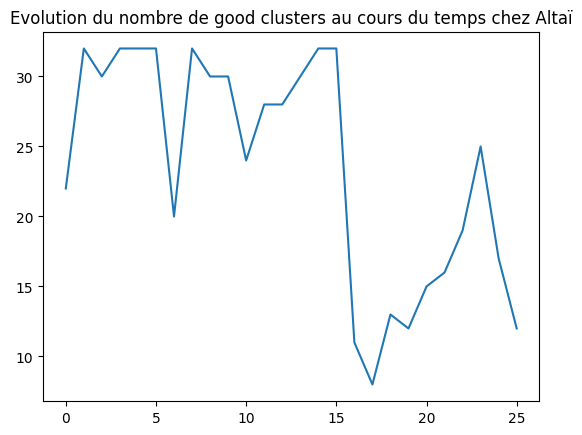

In [43]:
plt.plot(n)
plt.title('Evolution du nombre de good clusters au cours du temps chez Altaï')

In [26]:
gc

array([21,  4, 10,  8, 12, 19, 13, 15, 23, 14,  5,  6,  3, 18,  9, 22, 24,
        2, 26, 20,  0, 30, 25,  1])

In [6]:
tr_sustained, pb_sustained = [], []
tr_total_evoked, pb_total_evoked = [], []
tr_peak, pb_peak = [], []
for session in playback_sessions:
    path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/'

    tr_psth = np.load(path+f'psth_tracking_{bin_width}.npy')
    pb_psth = np.load(path+f'psth_playback_{bin_width}.npy')

    tr_sustained.append([get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in tr_psth])
    pb_sustained.append([get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in pb_psth])

    tr_total_evoked.append(get_total_evoked_response(tr_psth, t_pre, t_post, bin_width, None, 0, 140))
    pb_total_evoked.append(get_total_evoked_response(pb_psth, t_pre, t_post, bin_width, None, 0, 140))

    #tr_peak.append([tr_total_evoked[i] - tr_sustained[i] for i in range(len(tr_sustained))])
    #pb_peak.append([pb_total_evoked[i] - pb_sustained[i] for i in range(len(pb_sustained))])

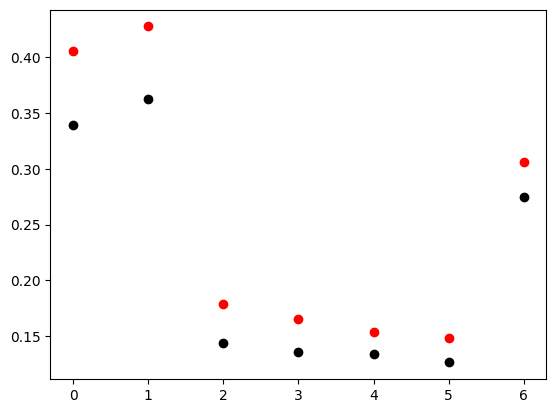

In [16]:
for i, elt in enumerate(tr_sustained):
    plt.scatter(i, np.nanmean(elt, axis=0), c = 'red')
    plt.scatter(i, np.nanmean(pb_sustained[i], axis=0), c = 'black')

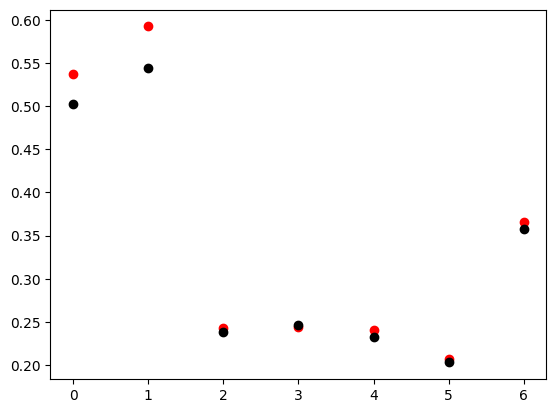

In [15]:
for i, elt in enumerate(tr_total_evoked):
    plt.scatter(i, np.nanmean(elt, axis=0), c = 'red')
    plt.scatter(i, np.nanmean(pb_total_evoked[i], axis=0), c = 'black')